# Comparando SVM com outros algoritmos (Classificação Binária - Qualidade Vinhos)

In [1]:
import trab03_utils as util

ds_dadosbrutos = util.getDSWine_RED_ClassProb()
ds_dadosbrutos.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,high_quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0


In [2]:
import autoML

automl = autoML.AutoML(ds_dadosbrutos, 'high_quality'
                             , min_x_y_correlation_rate=0.1
                             , n_features_threshold=0.75)

dfResults = automl.getResults()
dfResults.head(10)

,algorithm,features,n_features,train_time,mem_max,f1,accuracy,roc_auc,confusion_matrix
0,DecisionTreeClassifier,"(volatile acidity, citric acid, total sulfur d...",6,2.245390,194.519531,0.376410,0.846875,0.630733,"[[253, 30], [19, 18]]"
1,DecisionTreeClassifier,"(fixed acidity, volatile acidity, citric acid,...",7,2.346948,194.941406,0.333333,0.856250,0.618233,"[[258, 25], [16, 21]]"
2,DecisionTreeClassifier,"(fixed acidity, volatile acidity, citric acid,...",6,3.318600,194.878906,0.318315,0.853125,0.605733,"[[254, 29], [15, 22]]"
3,DecisionTreeClassifier,"(fixed acidity, volatile acidity, citric acid,...",6,2.284499,194.804688,0.315643,0.853125,0.627224,"[[255, 28], [16, 21]]"
4,DecisionTreeClassifier,"(fixed acidity, citric acid, total sulfur diox...",6,2.363258,194.722656,0.303262,0.840625,0.602287,"[[255, 28], [14, 23]]"
5,DecisionTreeClassifier,"(fixed acidity, volatile acidity, citric acid,...",6,2.377347,194.507812,0.302015,0.843750,0.621930,"[[261, 22], [17, 20]]"
6,DecisionTreeClassifier,"(fixed acidity, volatile acidity, total sulfur...",6,2.290152,194.929688,0.300952,0.843750,0.587907,"[[254, 29], [11, 26]]"
7,KNeighborsClassifier,"(volatile acidity, citric acid, total sulfur d...",6,2.416271,194.746094,0.278100,0.878125,0.727726,"[[268, 15], [24, 13]]"
8,DecisionTreeClassifier,"(fixed acidity, volatile acidity, citric acid,...",6,2.310773,194.640625,0.268848,0.825000,0.620207,"[[258, 25], [14, 23]]"
9,KNeighborsClassifier,"(fixed acidity, volatile acidity, citric acid,...",6,2.343441,194.742188,0.268571,0.878125,0.723191,"[[269, 14], [21, 16]]"


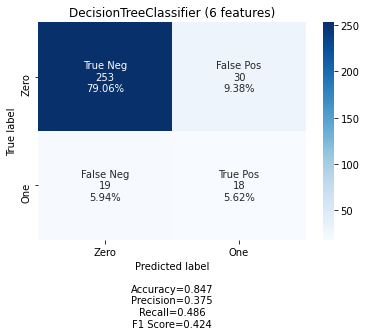

In [3]:
automl.getBestConfusionMatrix()

In [4]:
dfGroupBy_algorithm = dfResults.groupby('algorithm').mean().sort_values('f1', ascending=False)
dfGroupBy_algorithm

,train_time,mem_max,f1,accuracy,roc_auc
algorithm,,,,,
DecisionTreeClassifier,2.496862,193.417480,0.322567,0.841016,0.621198
KNeighborsClassifier,2.668907,193.207031,0.229282,0.873047,0.730594
SVC,2.539358,193.972656,0.077917,0.889062,0.722017
LogisticRegression,2.352879,191.925781,0.000000,0.884375,0.845950


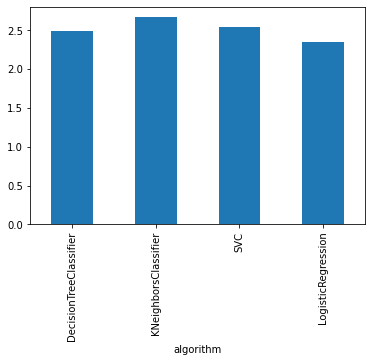

In [5]:
dfGroupBy_algorithm['train_time'].plot.bar();

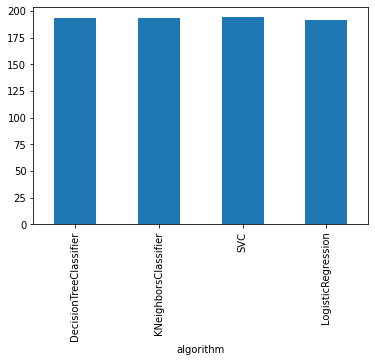

In [6]:
dfGroupBy_algorithm['mem_max'].plot.bar();

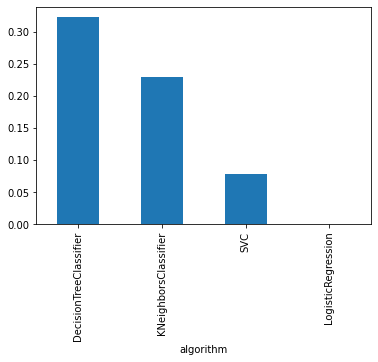

In [7]:
dfGroupBy_algorithm['f1'].plot.bar();

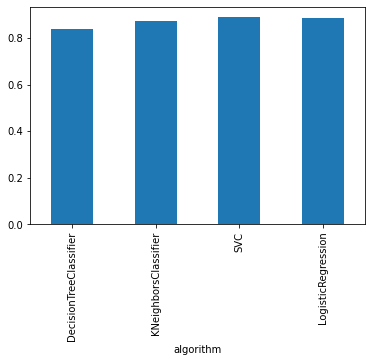

In [8]:
dfGroupBy_algorithm['accuracy'].plot.bar();

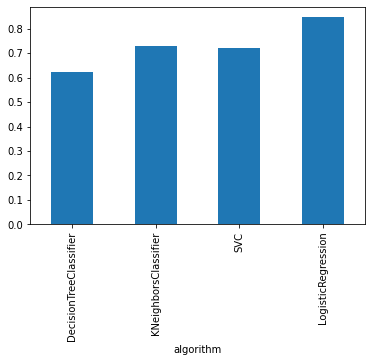

In [9]:
dfGroupBy_algorithm['roc_auc'].plot.bar();